In [159]:
import cv2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import display

from utils.skeleton_keypoints import compare_keypoints_list
keypoints_columns = [f"{keypoint}_{axis}" for keypoint in compare_keypoints_list for axis in ["x", "y"]]

In [160]:
df_sync = pd.read_csv("camera_sync.csv")
display(df_sync)

,max_lim_0,max_lim_1,max_lim_2,max_lim_3,max_lim_4,toe_off_0,toe_off_1,toe_off_2,toe_off_3,toe_off_4
0,NaN,NaN,NaN,NaN,NaN,73,76,77,77,76
1,NaN,NaN,NaN,NaN,NaN,84,87,88,88,87
2,NaN,NaN,NaN,NaN,NaN,92,95,96,96,95
3,NaN,NaN,NaN,NaN,NaN,116,119,120,120,119
4,NaN,NaN,NaN,NaN,NaN,62,65,66,66,65
5,NaN,NaN,NaN,NaN,NaN,102,105,106,106,105
6,NaN,NaN,NaN,NaN,NaN,106,109,110,110,109
7,NaN,NaN,NaN,NaN,NaN,135,138,139,139,138
8,NaN,NaN,NaN,NaN,NaN,68,71,72,72,71
9,NaN,NaN,NaN,NaN,NaN,63,66,67,67,66


In [ ]:
df_2d = pd.read_csv("annotations/hirasaki_0_1.csv", index_col=0)
df_2d = df_2d.drop(columns=[col for col in df_2d.columns if "visibility" in col])
df_2d = df_2d[df_2d.notnull().all(axis=1)]
display(df_2d)

df_3d = pd.read_csv("fixed_trajectories_3/hirasaki_1_trajectories.csv", index_col=0)
del df_3d["time"]
display(df_3d)

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
frame,,,,,,,,,,,,,,,,,,,,,
105,1350.0,401.0,1297.0,401.0,1385.0,510.0,1264.0,490.0,1411.0,590.0,...,1326.0,573.0,1260.0,746.0,1362.0,727.0,1189.0,887.0,1431.0,879.0


,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,LEFT_ELBOW_x,LEFT_ELBOW_y,LEFT_ELBOW_z,RIGHT_ELBOW_x,...,LEFT_KNEE_z,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z
frame,,,,,,,,,,,,,,,,,,,,,
1,1244.354797,2450.607056,1373.205689,963.300812,2455.405762,1370.462219,1293.294983,2422.684327,1085.890564,895.834106,...,506.138596,998.858642,2444.476196,517.770081,1151.861328,2477.697510,78.904274,1004.342712,2495.456787,77.898655
2,1244.397532,2449.704631,1373.333099,963.287185,2454.242249,1370.752370,1293.494802,2421.598958,1085.921041,895.866913,...,506.231511,998.957560,2444.228088,517.813202,1151.828786,2477.583883,78.947479,1004.349706,2495.393554,77.942085
3,1244.360921,2448.712728,1373.415934,963.341227,2453.284750,1370.980286,1293.552083,2420.565022,1086.122925,895.875214,...,506.334066,998.993469,2444.028117,517.857788,1151.764730,2477.468506,79.042215,1004.326152,2495.292074,77.972884
4,1244.431000,2448.048340,1373.735046,963.379288,2452.556213,1371.064057,1293.640686,2419.632202,1086.314239,895.870331,...,506.344681,999.013214,2443.849670,517.928070,1151.758270,2477.437378,79.132963,1004.303299,2495.285705,78.101282
5,1244.399251,2447.398926,1373.927348,963.378530,2451.501262,1371.276327,1293.698649,2418.732015,1086.386922,895.862640,...,506.368001,999.044271,2443.540934,517.955302,1151.661377,2477.360148,79.092353,1004.325043,2495.178182,78.123164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1246.687531,-884.235321,1380.799316,963.747741,-890.463821,1370.664337,1300.057862,-978.341415,1105.883209,895.909256,...,526.877929,1025.819275,-1017.245468,533.473114,1178.878174,-761.403763,260.829102,1067.534027,-1011.901169,93.344169
215,1246.266744,-900.633891,1384.527405,963.520152,-908.577851,1375.194682,1298.160990,-985.630920,1107.096334,894.070139,...,535.512736,1026.387532,-1020.984294,534.383291,1180.328410,-806.305868,256.175522,1067.521769,-1011.991668,93.715658
216,1245.973205,-917.246887,1387.403524,963.232773,-926.262914,1378.937775,1296.737335,-992.470057,1107.882924,892.062785,...,543.645269,1027.317794,-1025.204122,535.267451,1182.924062,-850.654683,249.825337,1068.766856,-1014.462311,93.396206


In [162]:
common_index_min = max(df_2d.index.min(), df_3d.index.min())
common_index_max = min(df_2d.index.max(), df_3d.index.max())

df_2d = df_2d.loc[common_index_min:common_index_max]
df_3d = df_3d.loc[common_index_min:common_index_max]

print(df_2d.shape, df_3d.shape)

(1, 24) (1, 36)


In [163]:
points_2d = df_2d.values.reshape(-1, 2)
points_3d = df_3d.values.reshape(-1, 3)
print(points_2d.shape, points_3d.shape)

(12, 2) (12, 3)


In [164]:
mtx = [
    [
        1632.4834064303332,
        0.0,
        552.9824263269749
    ],
    [
        0.0,
        1633.2548977165145,
        981.143491172429
    ],
    [
        0.0,
        0.0,
        1.0]
]
mtx = np.array(mtx)

In [165]:
_, rvec, tvec, inliers = cv2.solvePnPRansac(points_3d, points_2d, mtx, None, flags=cv2.SOLVEPNP_EPNP)
print(f"rvec: {rvec}")
print(f"tvec: {tvec}")

rvec: [[ 1.39814952]
 [ 1.66280437]
 [-1.25210533]]
tvec: [[ 849.21377735]
 [-561.26715588]
 [5783.25687453]]


In [166]:
rotation_matrix, _ = cv2.Rodrigues(rvec)
projection_matrix = np.hstack((rotation_matrix, tvec))

In [167]:
points_2d_projected, _ = cv2.projectPoints(points_3d, rvec, tvec, mtx, None)
points_2d_projected = points_2d_projected.reshape(-1, 2)
points_2d_projected = points_2d_projected.reshape(-1, len(compare_keypoints_list) * 2)

points_2d = points_2d.reshape(-1, len(compare_keypoints_list) * 2)

df_2d_projected = pd.DataFrame(points_2d_projected, columns=keypoints_columns)
df_2d_projected.index = df_2d.index
display(df_2d_projected)
display(df_2d)

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
frame,,,,,,,,,,,,,,,,,,,,,
105,1344.93426,394.157721,1319.712501,390.525481,1383.215592,510.065041,1267.471423,492.957789,1412.445681,591.366337,...,1331.267433,576.269968,1258.557195,747.499247,1361.052133,723.805546,1176.729327,887.496589,1428.220872,875.012744


,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
frame,,,,,,,,,,,,,,,,,,,,,
105,1350.0,401.0,1297.0,401.0,1385.0,510.0,1264.0,490.0,1411.0,590.0,...,1326.0,573.0,1260.0,746.0,1362.0,727.0,1189.0,887.0,1431.0,879.0


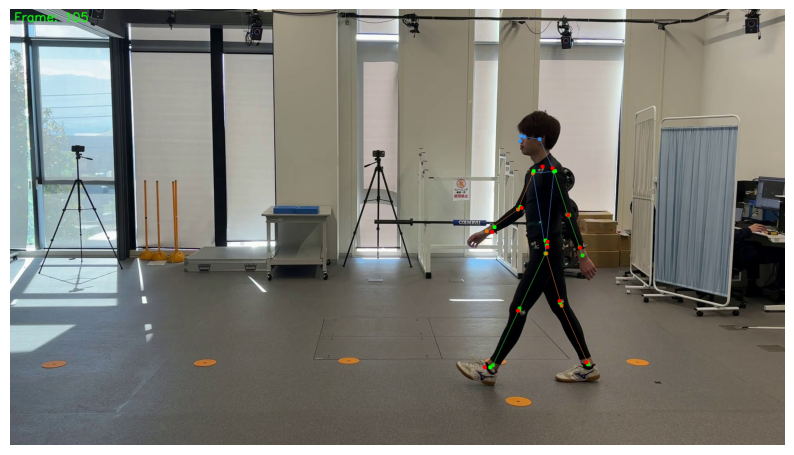

In [168]:
image_path = "img/hirasaki_0_1/hirasaki_0_1_105.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

points_2d = points_2d.reshape(-1, len(compare_keypoints_list), 2)
points_2d_projected = points_2d_projected.reshape(-1, len(compare_keypoints_list), 2)

for i in range(len(points_2d)):
    point_2d = points_2d[i]
    point_2d_projected = points_2d_projected[i]
    for j in range(len(compare_keypoints_list)):
        x, y = point_2d[j]
        x_projected, y_projected = point_2d_projected[j]
        cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)
        cv2.circle(image, (int(x_projected), int(y_projected)), 5, (255, 0, 0), -1)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

In [170]:
# 動画の作成
fourcc = cv2.VideoWriter_fourcc(*"MP4V")
video = cv2.VideoWriter("output.mp4", fourcc, 30, (image.shape[1], image.shape[0]))

for i in range(len(df_2d)):
    image_path = f"img/hirasaki_0_1/hirasaki_0_1_{i+1}.jpg"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    points_2d = df_2d.iloc[i].values.reshape(-1, 2)
    points_3d = df_3d.iloc[i].values.reshape(-1, 3)
    
    points_2d_projected, _ = cv2.projectPoints(points_3d, rvec, tvec, mtx, None)
    points_2d_projected = points_2d_projected.reshape(-1, 2)
    points_2d_projected = points_2d_projected.reshape(-1, len(compare_keypoints_list) * 2)
    points_2d = points_2d.reshape(-1, len(compare_keypoints_list) * 2)
    
    points_2d = points_2d.reshape(-1, len(compare_keypoints_list), 2)
    points_2d_projected = points_2d_projected.reshape(-1, len(compare_keypoints_list), 2)
    
    print(points_2d.shape, points_2d_projected.shape)
    
    for j in range(len(points_2d)):
        point_2d = points_2d[j]
        point_2d_projected = points_2d_projected[j]
        for k in range(len(compare_keypoints_list)):
            x, y = point_2d[k]
            x_projected, y_projected = point_2d_projected[k]
            cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)
            cv2.circle(image, (int(x_projected), int(y_projected)), 5, (255, 0, 0), -1)
    
    video.write(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

video.release()
cv2.destroyAllWindows()

(1, 12, 2) (1, 12, 2)


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
